In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
import pandas as pd
import numpy as np

In [3]:
df_job = pd.read_csv('./JobData.csv')
df_job['text'] = df_job['jobtitle'] + ' ' + df_job['employer'] + ' ' + df_job['location'] + ' ' + df_job['seniorityLevel'] + ' ' + df_job['employmentType'] + ' ' + df_job['jobFunction'] + ' ' + df_job['industry'] + ' ' + df_job['description']
df_job.head(10)

,Unnamed: 0,jobtitle,employer,location,seniorityLevel,employmentType,jobFunction,industry,salaryRange,jobStatus,description,text
0,0,Senior Statistical Modeller (Data Scientist),Lowell,"Leeds, England, United Kingdom",Associate,Full-time,Engineering and Information Technology,"Information Technology and Services, Computer ...",NaN,Open,"[""About Lowell\n\nAs one of Europe's leading a...",Senior Statistical Modeller (Data Scientist) L...
1,1,Software Developer (Entry-Mid level),networx | Recruitment Software & Services,"Otley, England, United Kingdom",Mid-Senior level,Full-time,Information Technology and Business Development,Staffing and Recruiting and Information Techno...,NaN,No longer accepting applications,"['Software Developer (Entry-Mid level)\nOtley,...",Software Developer (Entry-Mid level) networx |...
2,2,Data Scientist,TransUnion,"Leeds, England, United Kingdom",Not Applicable,Full-time,Engineering and Information Technology,"Financial Services, Information Services, and ...",NaN,Open,"[""About TransUnion\n\nWhat We'll Bring:\n\nTra...","Data Scientist TransUnion Leeds, England, Unit..."
3,3,Data Scientist,Corecom Consulting,"Leeds, England, United Kingdom",Mid-Senior level,Full-time,Information Technology,Information Technology and Services,NaN,No longer accepting applications,"['2x Data Scientists / Leeds / up to £45,000 D...","Data Scientist Corecom Consulting Leeds, Engla..."
4,4,Software Developer 3,Oracle,"Leeds, England, United Kingdom",Associate,Full-time,Engineering and Information Technology,"Information Technology and Services, Computer ...",NaN,Open,['Job Description\n\nOracle’s Secure Global De...,"Software Developer 3 Oracle Leeds, England, Un..."
5,5,Software Developer 3,Oracle,"Leeds, England, United Kingdom",Associate,Full-time,Engineering and Information Technology,"Information Technology and Services, Computer ...",NaN,Open,['Job Description\n\nThe role is for an engine...,"Software Developer 3 Oracle Leeds, England, Un..."
6,6,Software Developer,Morrisons,"Bradford, England, United Kingdom",Associate,Full-time,Engineering and Information Technology,"Food & Beverages, Food Production, and Retail",NaN,Open,"[""About The Role\n\nAre you a curious and prag...","Software Developer Morrisons Bradford, England..."
7,7,Software Developer (happy to discuss flexible ...,Grant Thornton UK LLP,"Leeds, England, United Kingdom",Not Applicable,Full-time,Engineering and Information Technology,"Information Technology and Services, Financial...",NaN,No longer accepting applications,"[""More than you expected\n\nGrant Thornton UK ...",Software Developer (happy to discuss flexible ...
8,8,Front-End Software Developer,Hays,"Halifax, England, United Kingdom",Entry level,Full-time,Engineering and Information Technology,"Construction, Staffing and Recruiting, and Fin...",NaN,Open,"[""Your New Company\n\nHays are recruiting on b...","Front-End Software Developer Hays Halifax, Eng..."
9,9,Software Engineer,FDM Group,"Leeds, England, United Kingdom",Entry level,Full-time,Information Technology and Consulting,Information Technology and Services,NaN,Open,['Your career starts here.\n\nInterested in pl...,"Software Engineer FDM Group Leeds, England, Un..."


In [4]:
exp = [['Information Technology', '4 years', 'Java, Python, C, C#, CPP, SQL, Linux'],
      ['Trainee Software Engineer', '6 months', 'JavaScript, ReactJS, MeteorJS, FireBase, MongoDB'],
      ['Data Science', '1 year', 'Machine Learning, Python, R, SQL, PowerBI, Data Warehouse']]

df_exp = pd.DataFrame(exp, columns=['study', 'period', 'description'])
df_exp['text'] = df_exp['study'] + ' ' + df_exp['period'] + ' ' + df_exp['description']

In [5]:
from nltk.corpus import stopwords
import re
import string
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords


stop = stopwords.words('english')
stop_words_ = set(stopwords.words('english'))
wn = WordNetLemmatizer()

def black_txt(token):
    return  token not in stop_words_ and token not in list(string.punctuation)  and len(token)>2   
  
def clean_txt(text):
    clean_text = []
    clean_text2 = []
    text = re.sub("'", "",text)
    text=re.sub("(\\d|\\W)+"," ",text) 
    text = text.replace("nbsp", "")
    clean_text = [ wn.lemmatize(word, pos="v") for word in word_tokenize(text.lower()) if black_txt(word)]
    clean_text2 = [word for word in clean_text if black_txt(word)]
    return " ".join(clean_text2)

df_job['text'] = df_job['text'].apply(clean_txt)
df_exp['text'] = df_exp['text'].apply(clean_txt)
df_exp

,study,period,description,text
0,Information Technology,4 years,"Java, Python, C, C#, CPP, SQL, Linux",information technology years java python cpp s...
1,Trainee Software Engineer,6 months,"JavaScript, ReactJS, MeteorJS, FireBase, MongoDB",trainee software engineer months javascript re...
2,Data Science,1 year,"Machine Learning, Python, R, SQL, PowerBI, Dat...",data science year machine learn python sql pow...


In [6]:
# Initialize Tfidf Vectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_jobid = tfidf_vectorizer.fit_transform((df_job['text']))
tfidf_jobid

<190x5306 sparse matrix of type '<class 'numpy.float64'>'
	with 42675 stored elements in Compressed Sparse Row format>

In [7]:
# Initialize Count Vectorizer

count_vectorizer = CountVectorizer()
count_jobid = count_vectorizer.fit_transform((df_job['text']))
count_jobid

<190x5306 sparse matrix of type '<class 'numpy.int64'>'
	with 42675 stored elements in Compressed Sparse Row format>

In [8]:
study = 'Information Technology'
index = np.where(df_exp['study'] == study)[0][0]
user_q = df_exp.iloc[[index]]
user_q

,study,period,description,text
0,Information Technology,4 years,"Java, Python, C, C#, CPP, SQL, Linux",information technology years java python cpp s...


In [9]:
# Tfidf Recomender

user_tfidf = tfidf_vectorizer.transform(user_q['text'])
cos_similarity_tfidf = map(lambda x: cosine_similarity(user_tfidf, x), tfidf_jobid)

In [10]:
output2 = list(cos_similarity_tfidf)
output2

[array([[0.02328264]]),
 array([[0.01618739]]),
 array([[0.05841137]]),
 array([[0.01445596]]),
 array([[0.0575948]]),
 array([[0.03320268]]),
 array([[0.03353333]]),
 array([[0.00812147]]),
 array([[0.01274313]]),
 array([[0.07952378]]),
 array([[0.02942227]]),
 array([[0.03584242]]),
 array([[0.02784744]]),
 array([[0.03607409]]),
 array([[0.03868918]]),
 array([[0.0431947]]),
 array([[0.00696521]]),
 array([[0.03370166]]),
 array([[0.01426422]]),
 array([[0.03022274]]),
 array([[0.01327872]]),
 array([[0.07829063]]),
 array([[0.09417313]]),
 array([[0.09667909]]),
 array([[0.00971532]]),
 array([[0.01368399]]),
 array([[0.02996646]]),
 array([[0.04382876]]),
 array([[0.0105284]]),
 array([[0.0053999]]),
 array([[0.01250358]]),
 array([[0.02210345]]),
 array([[0.02447351]]),
 array([[0.0924518]]),
 array([[0.00932162]]),
 array([[0.02409833]]),
 array([[0.03008352]]),
 array([[0.04430689]]),
 array([[0.00587547]]),
 array([[0.00996307]]),
 array([[0.00844803]]),
 array([[0.00697225]]

In [11]:
def get_recommendation(top, df_job, scores):
    recommendation = pd.DataFrame(columns = ['title', 'location',  'employer', 'seniorityLevel'])
    count = 0
    for i in top:
        recommendation.at[count, 'title'] = df_job['jobtitle'][i]
        recommendation.at[count, 'location'] = df_job['location'][i]
        recommendation.at[count, 'employer'] = df_job['employer'][i]
        recommendation.at[count, 'seniorityLevel'] =  df_job['seniorityLevel'][i]
        recommendation.at[count, 'score'] = scores[count]
        count += 1
    return recommendation

In [12]:
top = sorted(range(len(output2)), key=lambda i: output2[i], reverse=True)[:10]
list_scores = [output2[i][0][0] for i in top]
get_recommendation(top, df_job, list_scores)

,title,location,employer,seniorityLevel,score
0,Cloud Data Engineer,"Leeds, England, United Kingdom",TSSI Ltd,Mid-Senior level,0.101828
1,Software Development Engineer - Java,"Leeds, England, United Kingdom",Yorkshire Building Society,Associate,0.096679
2,Python Software Engineer - Fully Remote,"Leeds, England, United Kingdom",Identify Solutions,Entry level,0.095627
3,SQL / C# Developer,"Leeds, England, United Kingdom",SharkNinja,Entry level,0.094412
4,Infrastructure - Software Engineer,"Leeds, England, United Kingdom",Elastic,Not Applicable,0.094173
5,Data Analyst,"Leeds, England, United Kingdom",Hays,Entry level,0.092452
6,Software Developer C#/JAVA (HOMEBASED),"South Kirkby, England, United Kingdom",Servelec,Entry level,0.092235
7,C++ Developer : Cross Train to Java Developer ...,"Leeds, England, United Kingdom",TipTopJob,Entry level,0.091439
8,Software Developer,"Wakefield, England, United Kingdom",15ten15,Entry level,0.090256
9,Data Analyst,"Leeds, England, United Kingdom",Hays,Entry level,0.088317


In [13]:
# Count Vectorizer

user_count = count_vectorizer.transform(user_q['text'])
cosine_similarity_countv = map(lambda x: cosine_similarity(user_count, x), count_jobid)

In [14]:
output2 = list(cosine_similarity_countv)

In [15]:
top = sorted(range(len(output2)), key=lambda i: output2[i], reverse=True)[:10]
list_scores = [output2[i][0][0] for i in top]
get_recommendation(top, df_job, list_scores)

,title,location,employer,seniorityLevel,score
0,Data Engineer - 3 month Contract,"Leeds, England, United Kingdom",Real Staffing,Associate,0.219317
1,Cloud Data Engineer,"Leeds, England, United Kingdom",TSSI Ltd,Mid-Senior level,0.213335
2,SQL / C# Developer,"Leeds, England, United Kingdom",SharkNinja,Entry level,0.183230
3,Python Software Engineer - Fully Remote,"Leeds, England, United Kingdom",Identify Solutions,Entry level,0.182483
4,Software Engineer,"Leeds, England, United Kingdom",hackajob,Mid-Senior level,0.158451
5,Software Engineer,"Leeds, England, United Kingdom",FDM Group,Entry level,0.156028
6,Cloud Data Engineer,"Bradford, England, United Kingdom",Falcon Smart IT (FalconSmartIT),Mid-Senior level,0.155265
7,Cloud Data Engineer,"Leeds, England, United Kingdom",Falcon Smart IT (FalconSmartIT),Mid-Senior level,0.154942
8,Software Development Engineer - Java,"Leeds, England, United Kingdom",Yorkshire Building Society,Associate,0.151612
9,Database Software Developer,"Wakefield, England, United Kingdom",Hays,Entry level,0.150925


In [16]:
# KNN

n_neighbors = 11
KNN = NearestNeighbors(n_neighbors, p=2)
KNN.fit(tfidf_jobid)
NNs = KNN.kneighbors(user_tfidf, return_distance=True)

/home/dedsec_01/anaconda3/envs/skillbot/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_neighbors=11 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


In [17]:
NNs[0][0][1:]

array([1.34411377, 1.34489663, 1.34579903, 1.34597687, 1.34725514,
       1.34741638, 1.34800681, 1.34888427, 1.35032096, 1.35661263])

In [18]:
top = NNs[1][0][1:]
index_score = NNs[0][0][1:]

get_recommendation(top, df_job, index_score)

,title,location,employer,seniorityLevel,score
0,Software Development Engineer - Java,"Leeds, England, United Kingdom",Yorkshire Building Society,Associate,1.344114
1,Python Software Engineer - Fully Remote,"Leeds, England, United Kingdom",Identify Solutions,Entry level,1.344897
2,SQL / C# Developer,"Leeds, England, United Kingdom",SharkNinja,Entry level,1.345799
3,Infrastructure - Software Engineer,"Leeds, England, United Kingdom",Elastic,Not Applicable,1.345977
4,Data Analyst,"Leeds, England, United Kingdom",Hays,Entry level,1.347255
5,Software Developer C#/JAVA (HOMEBASED),"South Kirkby, England, United Kingdom",Servelec,Entry level,1.347416
6,C++ Developer : Cross Train to Java Developer ...,"Leeds, England, United Kingdom",TipTopJob,Entry level,1.348007
7,Software Developer,"Wakefield, England, United Kingdom",15ten15,Entry level,1.348884
8,Data Analyst,"Leeds, England, United Kingdom",Hays,Entry level,1.350321
9,Data Engineer - 3 month Contract,"Leeds, England, United Kingdom",Real Staffing,Associate,1.356613


In [28]:
# WordCloud

from PIL import Image
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

%matplotlib inline

In [29]:
bunch_text = ' '.join(text for text in df_job.tail(10000).text)

In [30]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white", colormap="magma").generate(bunch_text)

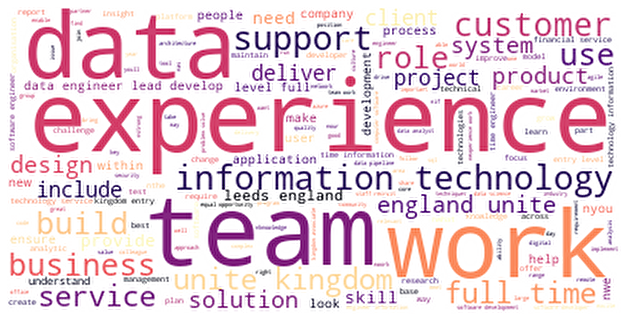

In [31]:
plt.figure(figsize=[11, 11])
plt.imshow(wordcloud, interpolation="sinc")
plt.axis("off")
plt.show()